In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
import matplotlib as mpl
from sklearn.utils import resample
import statistics as sta

In [2]:
#input file
input_data = 'clean_kaggle_data.csv'
df = pd.read_csv(input_data)

E:\Application\Anaconda\envs\MIE1622\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 1. Exploratory Data Analysis 
#### 1.1 Data Cleaning, keep features that are not broken down into multiple columns
    Q1: Age
    Q2: Sex
    Q3: Country
    Q4: Education
    Q5: Job Title
    Q6: Work Experience (in years)
    Q24: Salary

In [3]:
#select columns from original dataframe
dfc = df[['Q1','Q2','Q3','Q4','Q5','Q6','Q24']]
#change feature names
dfc = dfc.rename(columns={"Q1": "Age", "Q2": "Sex","Q3":"Country", "Q4": "Education_Level", "Q5":"Job_Title", "Q6":"Work_Experience", "Q24":"Salary"})
dfc_s = dfc.sort_values(by=['Sex', 'Age'])

#### Exploration of the values within each feature 

In [4]:
age_groups = dfc.Age.unique()
age_groups.sort()
sex = dfc.Sex.unique()
edu_lvl = dfc.Education_Level.unique()
jobs = dfc.Job_Title.unique()
w_exp = dfc.Work_Experience.unique()
w_exp.sort()
print("Age groups:", age_groups)
print("\nSex:",sex)
print("\nEducational Level:",edu_lvl)
print("\nJob Titles:", jobs)
print("\nWork Experience",w_exp)

Age groups: ['18-21' '22-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-69' '70+']

Sex: ['Man' 'Woman' 'Nonbinary' 'Prefer not to say' 'Prefer to self-describe']

Educational Level: ['Master’s degree' 'Bachelor’s degree' 'Doctoral degree'
 'Some college/university study without earning a bachelor’s degree'
 'Professional degree' 'I prefer not to answer'
 'No formal education past high school']

Job Titles: ['Data Engineer' 'Software Engineer' 'Data Scientist' 'Research Scientist'
 'Other' 'Statistician' 'Product/Project Manager' 'Data Analyst'
 'Machine Learning Engineer' 'Business Analyst' 'DBA/Database Engineer']

Work Experience ['1-2 years' '10-20 years' '20+ years' '3-5 years' '5-10 years'
 '< 1 years' 'I have never written code']


#### Lets look at the distribution of each gender,age group, job title
1. Sex: from the output below we can see that nore than 80% of the respondents of the surveys are man. 
2. Age: Around 85% of the respondents are between the age of 22-49. 
3. Top 3 jobs among all the respondents are: 1.Data Scientist 2. Software Engineer 3. Data Analyst (others compose many different jobs) 

In [5]:
print(dfc_s.groupby('Sex').size()/dfc_s['Age'].count()*100)
print('\n',dfc_s.groupby('Age').size()/dfc_s['Sex'].count()*100)
print('\n', dfc_s.groupby('Job_Title').size()/dfc_s['Job_Title'].count()*100)

Sex
Man                        82.691770
Nonbinary                   0.186411
Prefer not to say           1.220990
Prefer to self-describe     0.214372
Woman                      15.686457
dtype: float64

 Age
18-21     4.641626
22-24    13.272439
25-29    21.903253
30-34    18.445335
35-39    13.673222
40-44     9.711996
45-49     7.186131
50-54     4.995806
55-59     2.805480
60-69     2.880045
70+       0.484668
dtype: float64

 Job_Title
Business Analyst              6.319321
DBA/Database Engineer         1.043900
Data Analyst                 11.743872
Data Engineer                 3.439277
Data Scientist               22.350638
Machine Learning Engineer     8.556249
Other                        14.055364
Product/Project Manager       5.499115
Research Scientist            9.581508
Software Engineer            15.099264
Statistician                  2.311492
dtype: float64


#### To visualize the relationship among these features, lets plot a few graph
Figure 1. Gender Distribution among Differnt Age Groups: This is a right skewed graph. From the graph we can see the among all age group, majority of the respondents are male.  

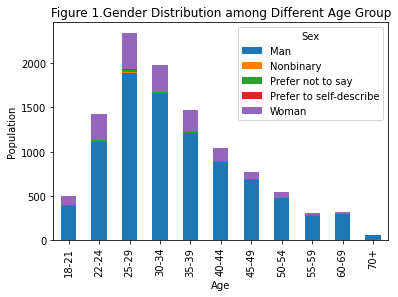

In [6]:
dfc_s.groupby(['Age','Sex']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Figure 1.Gender Distribution among Different Age Group")
plt.ylabel("Population")
plt.savefig('his_age')

Figure 2. Gender Distribution among Different Job: Most popular job are data scientists and software engineers. Least popular jobs are DBA and statisticians. 

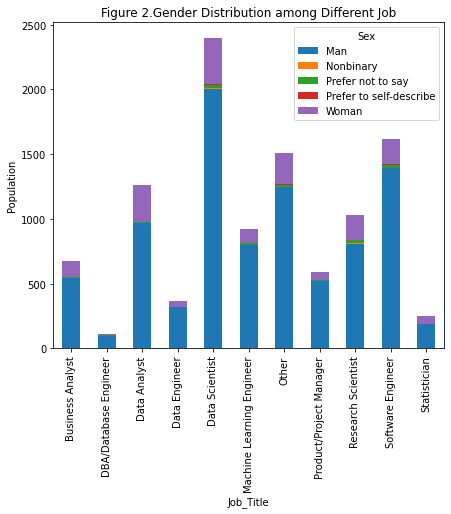

In [7]:
dfc_s.groupby(['Job_Title','Sex']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Figure 2.Gender Distribution among Different Job")
plt.ylabel("Population")
plt.gcf().set_size_inches(7,6 )

Figure 3. Boxplot for Salary Distribution among Different Education Level

Text(0.5, 1.0, 'Figure 3.Boxplot for distribution of Education_Level and Salary')

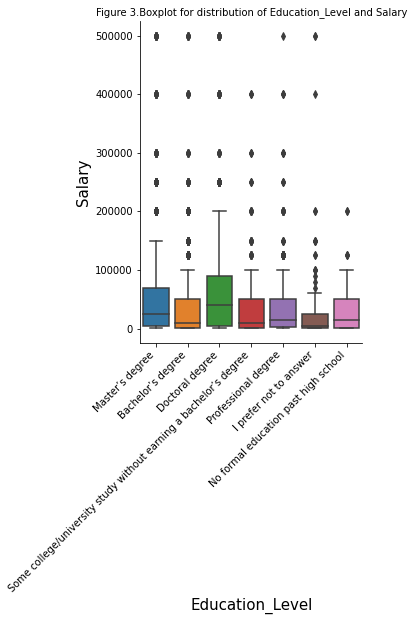

In [8]:
import seaborn as sns
fig_1 = sns.catplot(x='Education_Level', y='Salary', kind = 'box', height=5, data = dfc)
fig_1.set_xticklabels(rotation = 45, ha='right');

plt.xlabel('Education_Level', size = 15)
plt.ylabel('Salary', size = 15)
plt.title('Figure 3.Boxplot for distribution of Education_Level and Salary', size= 10)


### 2. Estimating the Salary Difference between Man and Woman
#### a. Descriptive Statistics Average Salary for Man and Woman 

In [9]:
#a) Compute and report descriptive statistics for each group, since we are only concern about man and woman, we will drop all other gender
#split data into man and woman 
df_m=dfc.loc[dfc['Sex'] == 'Man']
df_w=dfc.loc[dfc['Sex'] == 'Woman']
print("Descriptive Statistic of Man")
print(df_m.describe())
print("\nDescriptive Statistic of Woman")
print(df_w.describe())

Descriptive Statistic of Man
              Salary
count    8872.000000
mean    50750.619928
std     70347.974812
min      1000.000000
25%      3000.000000
50%     25000.000000
75%     70000.000000
max    500000.000000

Descriptive Statistic of Woman
              Salary
count    1683.000000
mean    36417.112299
std     59442.716093
min      1000.000000
25%      1000.000000
50%      7500.000000
75%     50000.000000
max    500000.000000


#### b. t - test

To perform a two-sample t-test, we need to first identify if the following assumptions are met. 

Assumption 1: The two samples are independent. What this means is that no individual has data in group A and B. 

Assumption 2: The data must follow a normal distributionWhat this means is that no individual has data in group A and B. 

Assumption 3: Homogeneity of Variance: The group variance are equal. 



In [10]:
#check normal distribution.This can be completed using the shapiro() method from Scipy.stats.0 with threshold = 0.05
stat_m, p_m = stats.shapiro(df_m['Salary'])
print('stat=%3f, p=%.3f' % (stat_m, p_m))
if p_m > 0.05:
    print('Man: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Man: The null hypothesis that the data are normally distributed is rejected')
stat_w, p_w = stats.shapiro(df_w['Salary'])
print('stat=%.3f, p=%.3f' % (stat_m, p_m))
if p_w > 0.05:
    print('Woman: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Woman: The null hypothesis that the data are normally distributed is rejected')

stat=0.701890, p=0.000
Man: The null hypothesis that the data are normally distributed is rejected
stat=0.702, p=0.000
Woman: The null hypothesis that the data are normally distributed is rejected


E:\Application\Anaconda\envs\MIE1622\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
#Check Homogeneity of Variance using scipy.stats.levene() with threshold = 0.05
stat,pval = stats.levene(df_m['Salary'],
             df_w['Salary'],
             center= 'mean')
if pval>0.05:
    print('Homogeneity of Variance is not rejected')
else:
    print('Homogeneity of Variance is rejected')

Homogeneity of Variance is rejected


Normality and homogeneity of variance assumption did not pass, therefore it is not suitable to perform t-test. 

#### c. Bootstrapping Data for comparing the mean of salary (Q24) for the two groups.

In [12]:
#bootstrapping data 
rep =1000                         #1000 replications
bmu_m = []                        # list to store bootstrapped mean for man 
bmu_w = []                        # list to store bootstrapped mean for woman  

bmu_diff = []                     # list to store bootstrapped mean difference between man and woman 
n_m = len(df_m)                   # number of instances resample from man 
n_w = len(df_w)                   # number of instances resample from man 
for i in range(rep):
    boot_m = df_m.sample(frac=1, replace =True)       #resample with data.sample()
    boot_w = df_w.sample(frac=1, replace =True)
    mu_m = sta.mean(boot_m['Salary'])                 #calculate mean 
    mu_w = sta.mean(boot_w['Salary'])

    mu_diff = abs(mu_m-mu_w)                          #calculate difference in mean 
    #store results 
    bmu_m.append(mu_m)
    bmu_w.append(mu_w)
    bmu_diff.append(mu_diff)


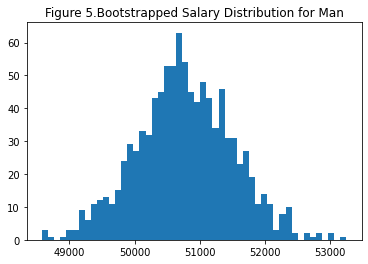

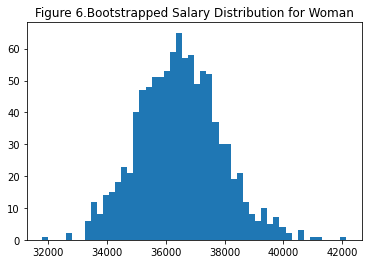

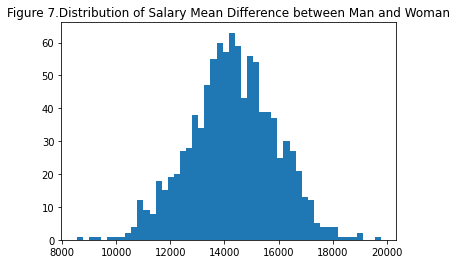

In [13]:
#plot bootstrap dist for man and woman 
plt.hist(bmu_m, density=False, bins=50) 
plt.title('Figure 5.Bootstrapped Salary Distribution for Man')
plt.show()
plt.hist(bmu_w, density=False, bins=50) 
plt.title('Figure 6.Bootstrapped Salary Distribution for Woman')
plt.show() 

#plot mean difference distribution 
plt.hist(bmu_diff, density=False, bins=50) 
plt.title('Figure 7.Distribution of Salary Mean Difference between Man and Woman')
plt.show() 

#### d. t-test on Bootstrapped Data 
The bootstrapped data are iid. We will check assumption 2 and 3. 

In [14]:
# normality check 
stat_m, p_m = stats.shapiro(bmu_m)
if p_m > 0.05:
    print('Man: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Man: The null hypothesis that the data are normally distributed is rejected')
stat_w, p_w = stats.shapiro(bmu_w)
if p_w > 0.05:
    print('Woman: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Woman: The null hypothesis that the data are normally distributed is rejected')
    
#Check Homogeneity of Variance
stat,pval = stats.levene(bmu_m,
             bmu_w,
             center= 'mean')
if pval>0.05:
    print('Homogeneity of Variance is not rejected')
else:
    print('Homogeneity of Variance is rejected')

Man: The null hypothesis that the data are normally distributed is not rejected 
Woman: The null hypothesis that the data are normally distributed is rejected
Homogeneity of Variance is rejected


Assumption 2 is satisfied but assumption 3 is not, therefore we will perform the Welch's t test

In [15]:
# Welch's t test
t_stat,t_pval = stats.ttest_ind(bmu_m,
                bmu_w,equal_var = False)

if t_pval >0.05:
    print('There is no statistically significant difference in the average salary between man and woman')
else:
    print('There is a statistically significant difference in the average salary between man and woman')

There is a statistically significant difference in the average salary between man and woman


 ### 3. Estimating the Salary Difference between Bachelor, Master and Doctoral Degree
#### a. Descriptive Statistics for Different Educational Level

In [16]:
#split dataset by educational level, other educational level will be dropped 
df_b = dfc[dfc['Education_Level'] == 'Bachelor’s degree']
#df_b = df_b[['Education_Level', 'Salary']]
df_mas = dfc[dfc['Education_Level'] == 'Master’s degree']
#df_mas = df_mas[['Education_Level', 'Salary']]
df_d = dfc[dfc['Education_Level'] == 'Doctoral degree']
#df_d = df_d[['Education_Level', 'Salary']]
print("Descriptive Statistic of Bachelor' Salary")
print(df_b.describe())
print("\nDescriptive Statistic of Master's Salary")
print(df_mas.describe())
print("\nDescriptive Statistic of Doctor's Salary")
print(df_d.describe())

Descriptive Statistic of Bachelor' Salary
              Salary
count    3013.000000
mean    35732.824427
std     60247.753546
min      1000.000000
25%      1000.000000
50%     10000.000000
75%     50000.000000
max    500000.000000

Descriptive Statistic of Master's Salary
              Salary
count    4879.000000
mean    52120.106579
std     67681.571528
min      1000.000000
25%      4000.000000
50%     25000.000000
75%     70000.000000
max    500000.000000

Descriptive Statistic of Doctor's Salary
              Salary
count    1718.000000
mean    68719.441211
std     85403.650394
min      1000.000000
25%      5000.000000
50%     40000.000000
75%     90000.000000
max    500000.000000


#### b. ANOVA test 

In [17]:
#check normal distribution.This can be completed using the shapiro() method from Scipy.stats.0 with threshold = 0.05 
stat_b, p_b = stats.shapiro(df_b['Salary'])
#print('stat=%f, p=%f' % (stat_m, p_m))
if p_b > 0.05:
    print('Bachelor’s degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Bachelor’s degree: The null hypothesis that the data are normally distributed is rejected')

stat_mas, p_mas = stats.shapiro(df_mas['Salary'])
#print('stat=%.3f, p=%.5f' % (stat_mas, p_mas))
if p_mas > 0.05:
    print('Master’s degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Master’s degree: The null hypothesis that the data are normally distributed is rejected')

stat_d, p_d = stats.shapiro(df_d['Salary'])
if p_d > 0.05:
    print('Doctoral degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Doctoral degree: The null hypothesis that the data are normally distributed is rejected')


#Check Homogeneity of Variance with threshold =0.05 
stat,pval = stats.levene(df_b['Salary'],
             df_mas['Salary'],df_d['Salary'],
             center= 'mean')
if pval>0.05:
    print('Homogeneity of Variance is not rejected')
else:
    print('Homogeneity of Variance is rejected')

Bachelor’s degree: The null hypothesis that the data are normally distributed is rejected
Master’s degree: The null hypothesis that the data are normally distributed is rejected
Doctoral degree: The null hypothesis that the data are normally distributed is rejected
Homogeneity of Variance is rejected


Normality and homogeneity of variance assumptions are rejected, therefore we will not perform ANOVA test

#### c. Bootrapping data 

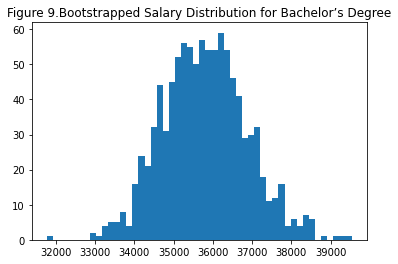

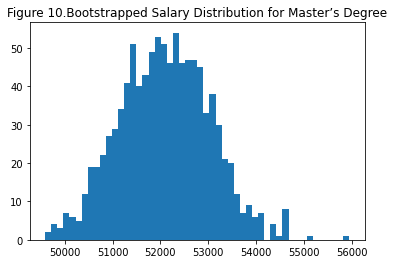

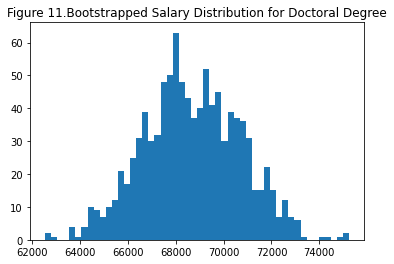

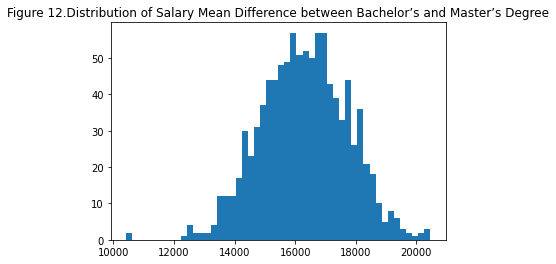

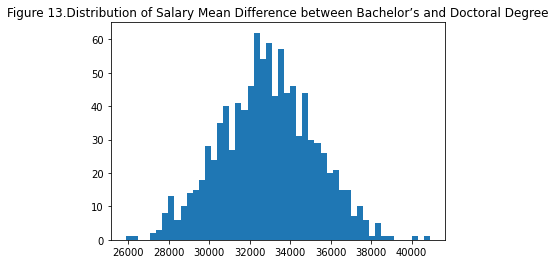

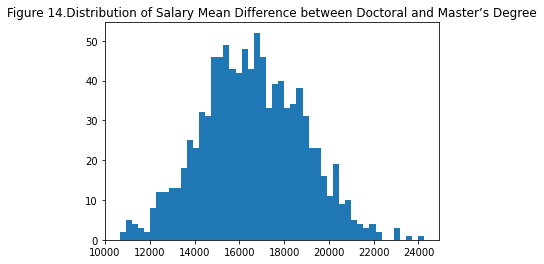

In [18]:
#bootstrapping data 
rep =1000                  # 1000 replications 

# create list to store bootstrapped mean 
bmu_b = []
bmu_mas =[]
bmu_d = []

#create list to store mean difference 
bmu_diff2 = []        # bachlor vs master 
bmu_diff3 = []       # bachlor vs doctoral
bmu_diff4 = []       # doctoral vs master 

for i in range(rep):
    #create bootstrapped sample 
    boot_b = df_b.sample(frac=1, replace =True)
    boot_mas = df_mas.sample(frac=1, replace =True)
    boot_d = df_d.sample(frac=1, replace =True)
    
    #calculate mean 
    mu_b = sta.mean(boot_b['Salary'])
    mu_mas = sta.mean(boot_mas['Salary'])
    mu_d = sta.mean(boot_d['Salary'])
    
    #calculate difference 
    mu_diff2 = abs(mu_b-mu_mas)
    mu_diff3 = abs(mu_b-mu_d)
    mu_diff4 = abs(mu_d-mu_mas)
    
    #store results 
    bmu_b.append(mu_b)
    bmu_mas.append(mu_mas)
    bmu_d.append(mu_d)

    bmu_diff2.append(mu_diff2)
    bmu_diff3.append(mu_diff3)
    bmu_diff4.append(mu_diff4)

#plot 
#plot bootstrap dist for different education level  
plt.hist(bmu_b, density=False, bins=50) 
plt.title('Figure 9.Bootstrapped Salary Distribution for Bachelor’s Degree')
plt.show()
plt.hist(bmu_mas, density=False, bins=50) 
plt.title('Figure 10.Bootstrapped Salary Distribution for Master’s Degree')
plt.show() 
plt.hist(bmu_d, density=False, bins=50) 
plt.title('Figure 11.Bootstrapped Salary Distribution for Doctoral Degree')
plt.show() 

#plot mu difference 
plt.hist(bmu_diff2, density=False, bins=50) 
plt.title('Figure 12.Distribution of Salary Mean Difference between Bachelor’s and Master’s Degree')
plt.show()
plt.hist(bmu_diff3, density=False, bins=50) 
plt.title('Figure 13.Distribution of Salary Mean Difference between Bachelor’s and Doctoral Degree')
plt.show() 
plt.hist(bmu_diff4, density=False, bins=50) 
plt.title('Figure 14.Distribution of Salary Mean Difference between Doctoral and Master’s Degree')
plt.show() 

#### d. ANOVA test on Bootstrapped Data

In [19]:
#check normal distribution.This can be completed using the shapiro() method from Scipy.stats.0
stat_b, p_b = stats.shapiro(bmu_b)
#print('stat=%f, p=%f' % (stat_m, p_m))
if p_b > 0.05:
    print('Bachelor’s degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Bachelor’s degree: The null hypothesis that the data are normally distributed is rejected')

stat_mas, p_mas = stats.shapiro(bmu_mas)
#print('stat=%.3f, p=%.5f' % (stat_mas, p_mas))
if p_mas > 0.05:
    print('Master’s degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Master’s degree: The null hypothesis that the data are normally distributed is rejected')

stat_d, p_d = stats.shapiro(bmu_d)
if p_d > 0.05:
    print('Doctoral degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Doctoral degree: The null hypothesis that the data are normally distributed is rejected')

#Check Homogeneity of Variance
stat,pval = stats.levene(bmu_b,
             bmu_mas,bmu_d,
             center= 'mean')
if pval>0.05:
    print('Homogeneity of Variance is not rejected')
else:
    print('Homogeneity of Variance is rejected')

Bachelor’s degree: The null hypothesis that the data are normally distributed is not rejected 
Master’s degree: The null hypothesis that the data are normally distributed is not rejected 
Doctoral degree: The null hypothesis that the data are normally distributed is not rejected 
Homogeneity of Variance is rejected


Homogeneity of Variance is rejected, but for the purpose of showing the implementation of ANOVA test, we will assume all assumptions met. 

In [20]:
#assume all normal and equal variance
F,p = stats.f_oneway(bmu_b, bmu_mas, bmu_d)
print(F,p)
if p >0.05:
    print('There is no statistically significant difference in the average salary between the three degree')
else:
    print('There is a statistically significant difference in the average salary between the three degree')

132194.68925806787 0.0
There is a statistically significant difference in the average salary between the three degree
